In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score
from transformers import pipeline
import torch

In [2]:
classifier = pipeline('sentiment-analysis')
type(classifier)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


transformers.pipelines.text_classification.TextClassificationPipeline

In [3]:
classifier("This is a great movie")

[{'label': 'POSITIVE', 'score': 0.9998798370361328}]

In [4]:
classifier(["This is the worst movie", "I usually loves movies!"])

[{'label': 'NEGATIVE', 'score': 0.9997289776802063},
 {'label': 'POSITIVE', 'score': 0.9994913339614868}]

In [5]:
tweets = pd.read_excel("sentiment and emotion tweets dataset.xlsx")
tweets.head(5)

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,0,2022-09-30 23:29:15+00:00,1575991191170340096,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425129984,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423749888,"AsÂ @CRNÂ celebrates its 40th anniversary,Â Bo...",jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485029888,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124


In [6]:
df = tweets[["sentiment", "emotion", "Text"]]
df.head(5)

,sentiment,emotion,Text
0,neutral,anticipation,@Logitech @apple @Google @Microsoft @Dell @Len...
1,neutral,joy,@MK_habit_addict @official_stier @MortalKombat...
2,positive,joy,"AsÂ @CRNÂ celebrates its 40th anniversary,Â Bo..."
3,negative,anger,@dell your customer service is horrible especi...
4,neutral,anger,@zacokalo @Dell @DellCares @Dell give the man ...


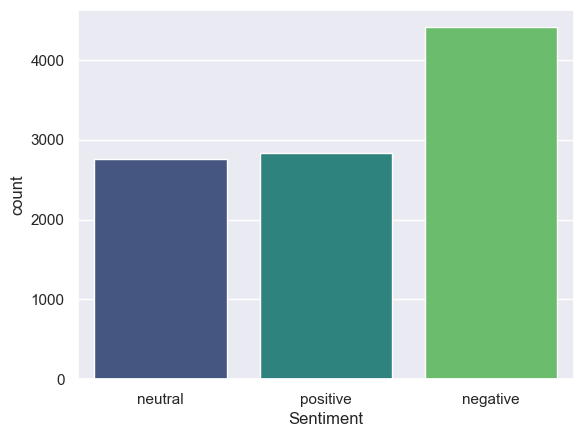

In [7]:
sns.countplot(df, x='sentiment', palette = "viridis");
plt.xlabel("Sentiment")
plt.ylabel("count")
plt.show()

In [8]:
df = df[df['sentiment'] != 'neutral']

In [9]:
df['target'] = df['sentiment'].map({'positive': 1, 'negative':0})

In [10]:
print("NaNs in target:", df['target'].isna().sum())

NaNs in target: 0


In [11]:
df_clean = df.dropna(subset=['target'])

In [12]:
print('Number of Rows:', df.shape[0])

Number of Rows: 7242


In [13]:
texts = df_clean['Text'].tolist()
predictions = classifier(texts)
predictions [:5]

[{'label': 'POSITIVE', 'score': 0.9386908411979675},
 {'label': 'NEGATIVE', 'score': 0.9987937211990356},
 {'label': 'NEGATIVE', 'score': 0.999596893787384},
 {'label': 'POSITIVE', 'score': 0.566603422164917},
 {'label': 'NEGATIVE', 'score': 0.5761304497718811}]

In [14]:
probs = [pred['score'] if pred['label'].startswith('P') else 1 - pred['score'] for pred in predictions]

In [15]:
preds = np.array([1 if pred['label'].startswith('P') else 0 for pred in predictions])

In [16]:
print(len(df_clean['target']) == len(preds))


True


In [17]:
print("NaNs in target:", df_clean['target'].isna().sum())


NaNs in target: 0


In [18]:
print(f"Accuracy: {round(np.mean(df_clean['target'] ==preds) *100, 2)} %")

Accuracy: 83.54 %


In [19]:
cm = confusion_matrix(df_clean['target'], preds, normalize = 'true')

In [20]:
def plot_confusion_matrix(confusion_matrix, labels):
    plt.figure(figsize=(8,6))
    sns.set(font_scale = 2.4)

    sns.heatmap(confusion_matrix, annot=True, fmt = 'g', cmap="Blues", xticklabels = labels, yticklabels = labels)

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    

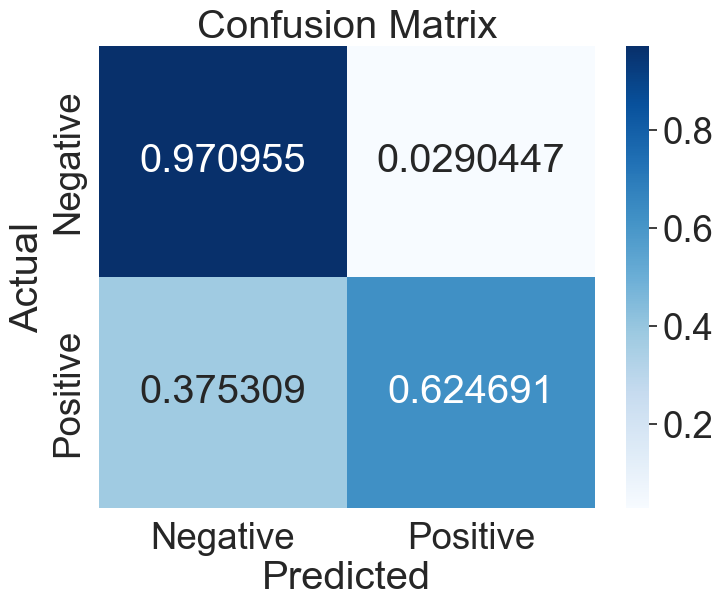

In [21]:
plot_confusion_matrix(cm, ["Negative","Positive"])

In [22]:
print(f"roc auc score: {roc_auc_score(df_clean['target'], probs)}")

roc auc score: 0.9484265252210189
